# **Linear Regression**

In [126]:
# Importing some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

# **california_housing Dataset**

---


**The following function returns:**
dataset : dict-like object with the following attributes:

**dataset.data :** ndarray, shape [20640, 8]

    Each row corresponding to the 8 feature values in order.
**dataset.target :** numpy array of shape (20640,)

    Each value corresponds to the average house value in units of 100,000.
**dataset.feature_names :** array of length 8

    Array of ordered feature names used in the dataset.
**dataset.DESCR :** string

    Description of the California housing dataset.


---



In [127]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------



---
The data contains 20,640 observations on 9 variables.

This dataset contains the **average house value as target variable**
and the following input variables (features): **average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude** in that order.

**Let us now extract the features and the target from the dataset and combine them in one data frame.**

---



In [128]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [129]:
##to check for Nan values
##df['MedInc'].isnull().values.any()

In [130]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010



---

Let us use the function **df.corr()** to compute pairwise correlation of columns, excluding NA/null values.

---



In [131]:
df.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Population -0.108785   0.099773 -0.024650  
AveOccup    0.002366   0.002476 -0.023737  
Latitude    1.000000  -0.924664 -0.144160  
Longitude  -0.924664   1.000000 -0.045967  
Target     -0.144160  -0.045967  1.000000



---

Let us consider only one feature say **MedInc**

---



In [132]:
df[['MedInc', 'Target']].describe()

MedInc        Target
count  20640.000000  20640.000000
mean       3.870671      2.068558
std        1.899822      1.153956
min        0.499900      0.149990
25%        2.563400      1.196000
50%        3.534800      1.797000
75%        4.743250      2.647250
max       15.000100      5.000010

**Pre-Processing**

Notice that 75% of the data has price less than 2.65, but maximum price go as high as 5. Thus we should remove the extremely expensive houses which might prone noise.

In [133]:
df = df[df.Target < 5 ]


In [134]:
# Normalization of the MedInc and Target

def Norm(x):
  minx = x.min()
  maxx = x.max()
  return pd.Series([(i - minx)/(maxx-minx) for i in x])
  
x = Norm(df.MedInc)
y = Norm(df.Target)
print("maximum value of MedInc = {}".format(x.max()))
print("maximum value of Target = {}".format(y.max()))

maximum value of MedInc = 1.0
maximum value of Target = 1.0


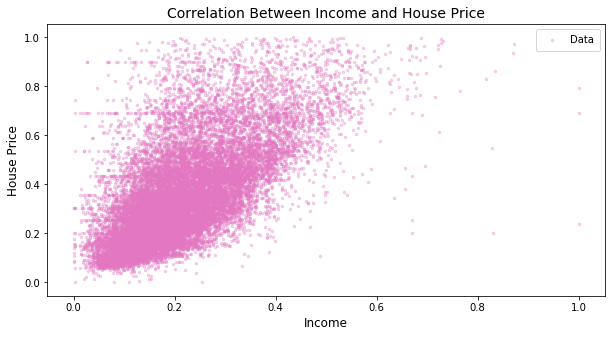

In [135]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data',c='#e377c2',  s=6 , alpha = 0.3)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(loc=1, fontsize=10, borderpad=.6)
plt.show()

#**Linear Regression With scikit-learn**



---


There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.


---



In [136]:
# Note X need to have one column and as many rows as necessary

X= np.array(x).reshape((-1, 1))
y=np.array(y)

print(x.ndim)
print(x.shape)
print(X.ndim)
print(X.shape)


1
(19648,)
2
(19648, 1)




---


This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:

1. fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏 (True) or consider it equal to zero (False).
2. normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
3. n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.


---




In [137]:
#create a linear regression model and fit it using the existing data
model = LinearRegression(normalize=False)


In [138]:
#fit(), you calculate the optimal values of the weights m and 𝑏, using the existing input and output (X and y) as the argument
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.10336187126396168
slope: [1.19772056]


In [140]:
y_pred = model.predict(X)
print(y_pred)
print(y_pred.ndim)

[0.74973383 0.74776795 0.66153326 ... 0.20249047 0.21630123 0.25936902]
1


In [141]:
y_pred = model.intercept_ + model.coef_ * X
print('predicted response:', y_pred, sep='\n')
print(type(y_pred))
print(y_pred.ndim)

predicted response:
[[0.74973383]
 [0.74776795]
 [0.66153326]
 ...
 [0.20249047]
 [0.21630123]
 [0.25936902]]
<class 'numpy.ndarray'>
2


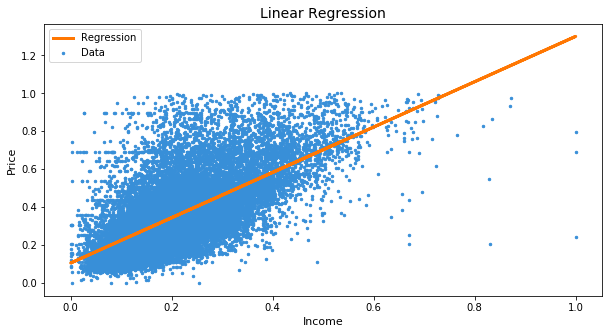

In [142]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=0, fontsize=10)
plt.show()

# **Linear Regression from Scratch**



---

We can represent the linear regression by the following equation:

**y = mx+b** 

where m is the slope, b is the intercept, and x is the median income.

---



In [143]:
class LinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2))) #how?
        # deriving further from the matrix formulae in notes we arrive at these numbers
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    

In [144]:
# Normalization of the MedInc and Target

def Norm(x):
  minx = x.min()
  maxx = x.max()
  return pd.Series([(i - minx)/(maxx-minx) for i in x])
X = Norm(df.MedInc)
y = Norm(df.Target)
print("maximum value of MedInc = {}".format(x.max()))
print("maximum value of Target = {}".format(y.max()))

maximum value of MedInc = 1.0
maximum value of Target = 1.0


In [145]:
lr = LinearRegression()

In [146]:
lr.fit(X, y)

In [147]:
y_pred = lr.predict()

In [148]:
m,b = lr.coeffs()

In [149]:
print("MSE:{}".format(mean_squared_error(y, y_pred)))
print("slope:{}".format(m))
print("intercept:{}".format(b))

MSE:0.023408891983089833
slope:1.1977205624290637
intercept:0.10336187126397767


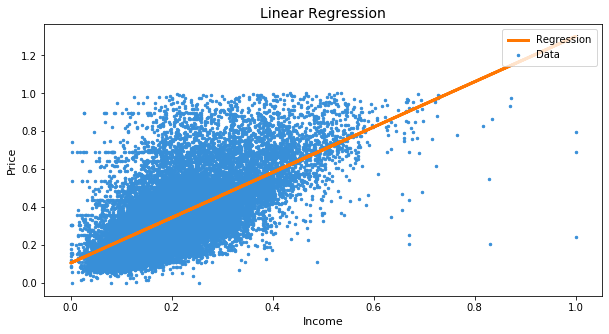

In [150]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

# **Gradient Descent**

While in Gradient Descent (GD) the whole Training Set is considered before taking one Model Parameters Update Step, in Stochastic Gradient Descent (SGD) only one Data Point is considered for each Model Parameters Update Step, cycling over the Training Set.

In [151]:
def gradient_descent(X, y, lr, epoch):
    
    m, b = 0.1, 0.1 # parameters
    mse = [] 
    N = len(X) # number of samples
    
    for _ in range(epoch):
                
        f = y - (m*X + b)
        
        # Updating m and b
        m -= lr * (-2 * X.dot(f).sum() / N)                                                   #how?
        b -= lr * (-2 * f.sum() / N)
        mse.append(mean_squared_error(y, (m*X + b)))        
    
    return m, b, mse

MSE: 0.5546937005203618


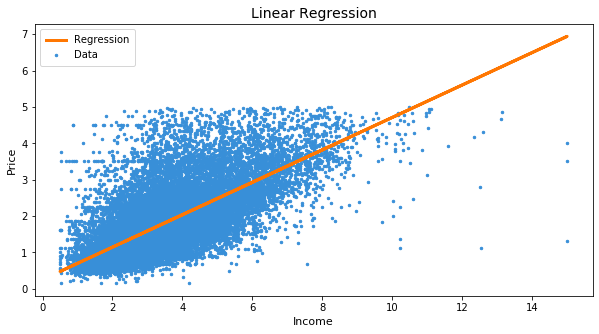

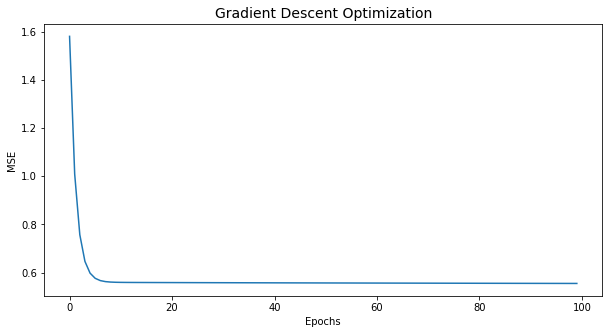

In [152]:
# X = Norm(df.MedInc)
# y = Norm(df.Target)
X = df.MedInc
y = df.Target

m, b, mse = gradient_descent(X, y, lr=0.01, epoch=100)
#print(m , b, 'hh')
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()



plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)                                                           #why?
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# **Ridge Regression**

In [153]:
# Let us use the same dataset california_housing
housing_data = california_housing.fetch_california_housing()

Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

housing_data.data = preprocessing.scale(housing_data.data)
X_train, X_test, y_train, y_test = train_test_split(
    housing_data.data, housing_data.target, test_size=0.3, random_state=10)        #why data?
df.head()


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [154]:
# initialize
ridge_reg = Ridge(alpha=0)                                            
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': housing_data.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []
ridge_df.head()

variable  estimate
0      MedInc  0.837657
1    HouseAge  0.121767
2    AveRooms -0.282765
3   AveBedrms  0.359682
4  Population  0.001481

In [155]:
# iterate lambdas                                                              #what is lmbda?
for alpha in np.arange(0, 400, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe

ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate')
ridge_df

variable       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
estimate                                                                     
estimate     0.837657  0.121767 -0.282765   0.359682    0.001481 -0.043425   
estimate0    0.837657  0.121767 -0.282765   0.359682    0.001481 -0.043425   
estimate1    0.837597  0.121861 -0.282527   0.359359    0.001511 -0.043439   
estimate2    0.837537  0.121954 -0.282289   0.359036    0.001541 -0.043454   
estimate3    0.837477  0.122047 -0.282051   0.358714    0.001571 -0.043468   
...               ...       ...       ...        ...         ...       ...   
estimate395  0.807311  0.145340 -0.198736   0.253067    0.008929 -0.046291   
estimate396  0.807230  0.145376 -0.198557   0.252849    0.008940 -0.046293   
estimate397  0.807148  0.145412 -0.198377   0.252631    0.008951 -0.046296   
estimate398  0.807067  0.145448 -0.198198   0.252414    0.008962 -0.046298   
estimate399  0.806986  0.145484 -0.198020   0.252197    0.008973 -0.046301   

variable     Latitude  Longitude  
estimate                          
estimate    -0.923852  -0.891802  
estimate0   -0.923852  -0.891802  
estimate1   -0.922939  -0.890877  
estimate2   -0.922028  -0.889954  
estimate3   -0.921119  -0.889033  
...               ...        ...  
estimate395 -0.674426  -0.638026  
estimate396 -0.673986  -0.637577  
estimate397 -0.673548  -0.637129  
estimate398 -0.673110  -0.636682  
estimate399 -0.672673  -0.636235  

[401 rows x 8 columns]

Values of weights of eac class as iterations go from 0 to 499


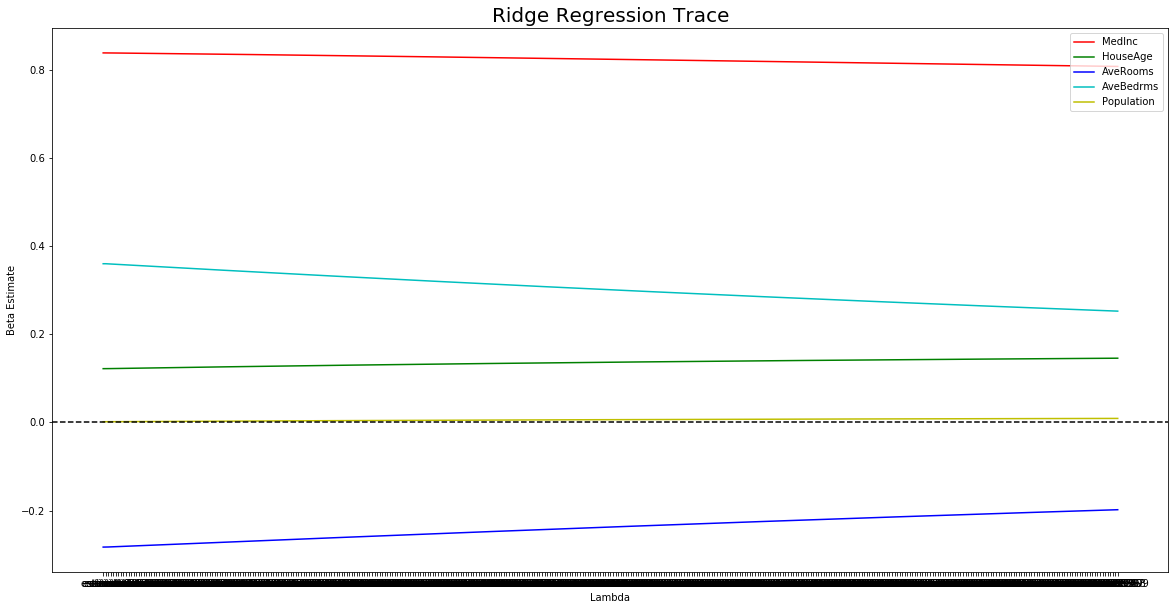

In [156]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(ridge_df.MedInc, 'r', ridge_df.HouseAge, 'g',
        ridge_df.AveRooms, 'b', ridge_df.AveBedrms, 'c', ridge_df.Population, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=20)
ax.legend(labels=['MedInc','HouseAge','AveRooms','AveBedrms','Population'])
ax.grid(False)
print('Values of weights of eac class as iterations go from 0 to 499')

# **Logistic Regression**


---


 You can download the dataset from:
 https://www.kaggle.com/uciml/pima-indians-diabetes-database


---



In [157]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [158]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
y = df.Outcome # Target variable


In [159]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [160]:

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

C:\Users\prakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [161]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

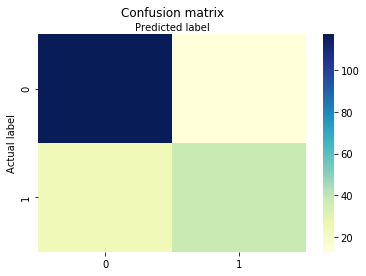

In [162]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks)
plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), cmap="YlGnBu")                                           #what?
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [163]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


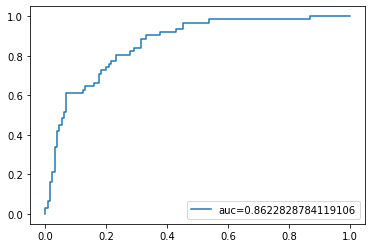

In [164]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Support Vector Machine**



---
Let us create a **linearly separable** dataset.


---



(768, 7) <class 'pandas.core.series.Series'>


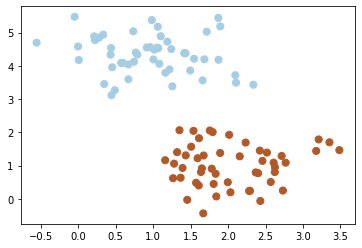

In [165]:
from sklearn.datasets.samples_generator import make_blobs
print(X.shape , type(x))
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

In [40]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1000)
#clf = svm.SVC()
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

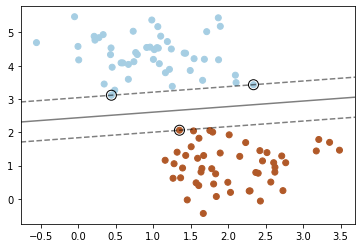

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

#decision_function(self, X) evaluates the decision function for the samples in X.
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [42]:
# # the support vectors are:
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])